# Exploratory Data Analysis

##### Description of Data, as available on Kaggle: 

Attribute Information
- gender: "Male", "Female" or "Other"
- age: age of the patient
- hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
- heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
- ever_married: "No" or "Yes"
- work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
- Residence_type: "Rural" or "Urban"
- avg_glucose_level: average glucose level in blood
- bmi: body mass index
- smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
- stroke: 1 if the patient had a stroke or 0 if not

Note: "Unknown" in smoking_status means that the information is unavailable for this patient

In [2]:
# Import Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set()
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

# Set colour palette for consistency
colors = ['#F08080', '#6495ED']

## Assessment Metric: Stroke Rate 

To analyse our categorical data, we will look at **Stroke Rate (0 - 1)**. 
- This is a better way (as compared to count) to analyse the data given that there could be differing number of values under each category for each variable. 

Stroke rate is found by the ***average value of the variable "stroke" for each group***. i.e  Stroke rate of men = number of male patients reporting stroke / total number of male patients. We assess each factor's relationship with strokes by looking at the proportion of people who get strokes instead of the total number.

In [4]:
adjusted_data = pd.read_csv('adjusted_data.csv')

## Overview of Data

In [5]:
adjusted_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5109 entries, 0 to 5108
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         5109 non-null   int64  
 1   gender             5109 non-null   object 
 2   age                5109 non-null   float64
 3   hypertension       5109 non-null   int64  
 4   heart_disease      5109 non-null   int64  
 5   ever_married       5109 non-null   object 
 6   work_type          5109 non-null   object 
 7   Residence_type     5109 non-null   object 
 8   avg_glucose_level  5109 non-null   float64
 9   bmi                5109 non-null   float64
 10  smoking_status     5109 non-null   object 
 11  stroke             5109 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.1+ KB


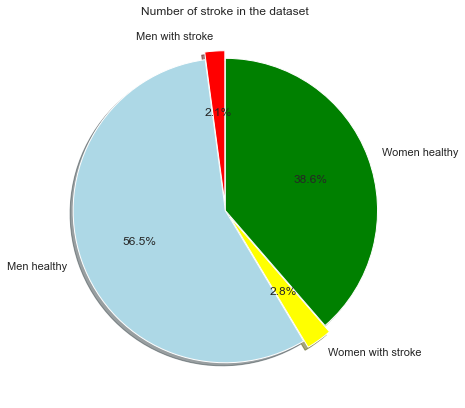

In [6]:
len_data = len(adjusted_data)
len_w = len(adjusted_data[adjusted_data["gender"]=="Male"])
len_m = len_data - len_w

men_stroke = len(adjusted_data.loc[(adjusted_data["stroke"]==1)&(adjusted_data['gender']=="Male")])
men_no_stroke = len_m - men_stroke

women_stroke = len(adjusted_data.loc[(adjusted_data["stroke"]==1) & (adjusted_data['gender']=="Female")])
women_no_stroke = len_w - women_stroke

labels = ['Men with stroke','Men healthy','Women with stroke','Women healthy']
values = [men_stroke, men_no_stroke, women_stroke, women_no_stroke]

colors = ["red","lightblue", "yellow", "green"]
explode = (0.05,0,0.05,0) 
 
plt.figure(figsize=(7,7))
plt.pie(values, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90,)

plt.title('Number of stroke in the dataset')
plt.show()

## Continuous Variables

## Age

Text(0.5, 0, 'Age')

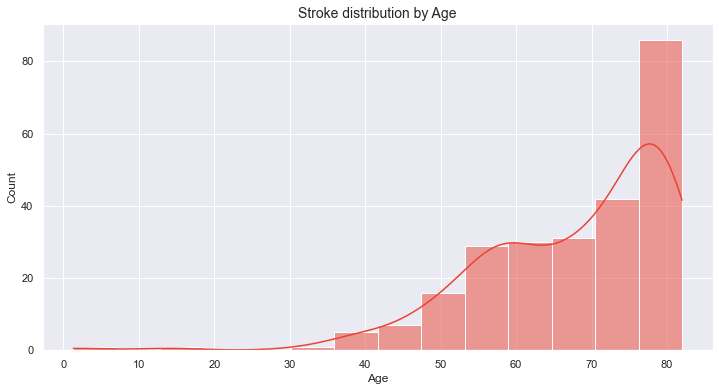

In [7]:
fig, ax = plt.subplots(figsize = (12, 6))
plt.title('Stroke distribution by Age', size = 14)

sb.histplot(adjusted_data[adjusted_data['stroke']==1], x="age", ax=ax, kde=True, color='#ea4335')
plt.xlabel('Age', )

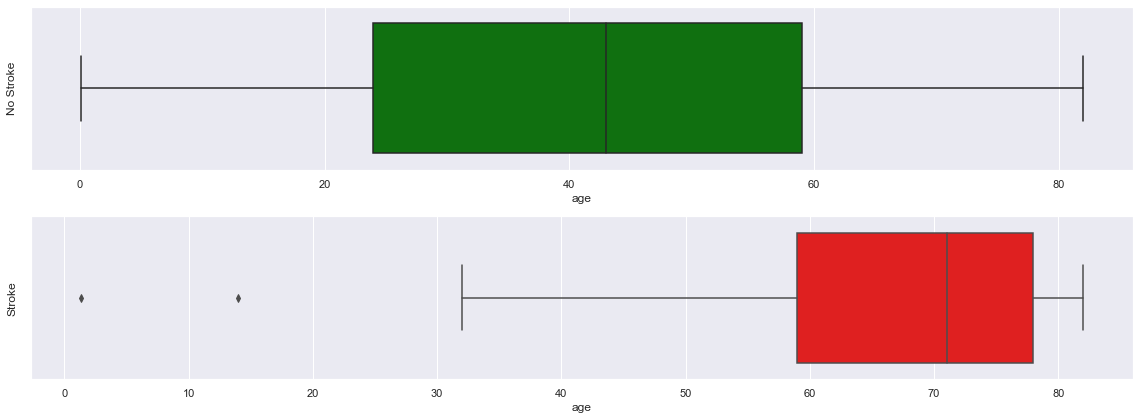

In [8]:
fig, ax = plt.subplots(2,1, figsize = (16,6))

sb.boxplot(x = adjusted_data[adjusted_data["stroke"] == 0]["age"],color='green', ax = ax[0]).set(ylabel = 'No Stroke')
sb.boxplot(x =adjusted_data[adjusted_data["stroke"] == 1]["age"],color='red', ax = ax[1]).set(ylabel = 'Stroke')
plt.tight_layout()

#### Analysis

Count of stroke patients increase as age increases. A larger proportion of stroke patients are of a higher age. The median age for patients with stroke is higher than that of patients without stroke. Older people suffer from strokes more than younger people. 

As people age, their health deteriorates, which may be the reason why stroke victims are mostly older.

## Avg_glucose_level

Text(0.5, 0, 'Average Glucose Level')

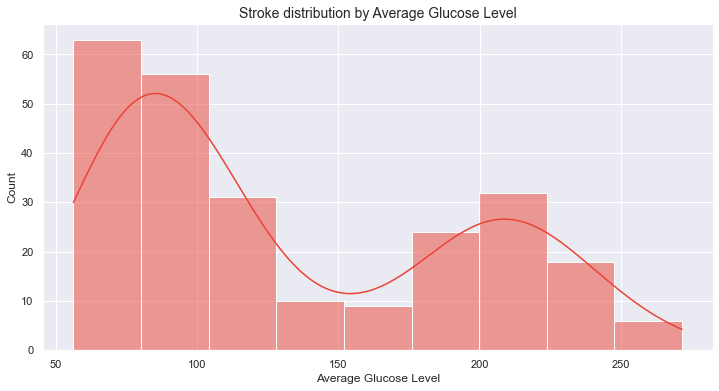

In [9]:
fig, ax = plt.subplots(figsize = (12, 6))
plt.title('Stroke distribution by Average Glucose Level', size = 14)

sb.histplot(adjusted_data[adjusted_data['stroke']==1], x="avg_glucose_level", ax=ax, kde=True, color='#ea4335')
plt.xlabel('Average Glucose Level', )

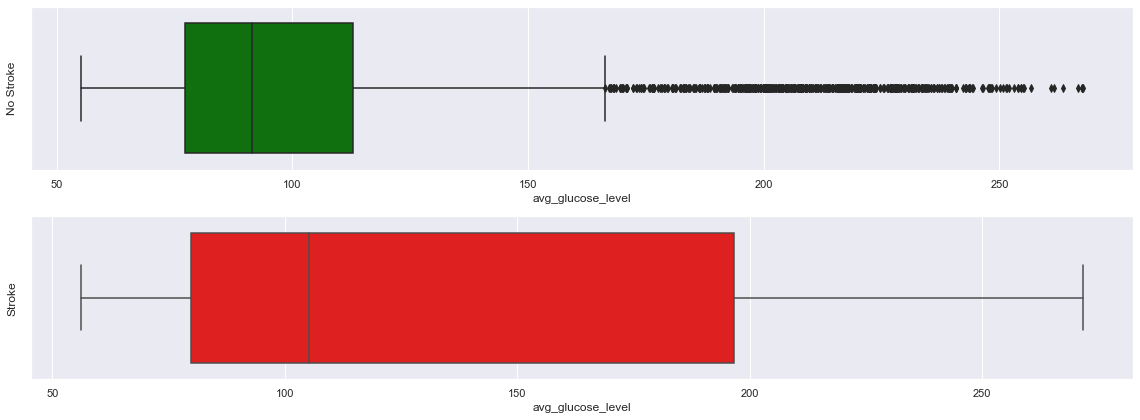

In [10]:
fig, ax = plt.subplots(2,1, figsize = (16,6))

sb.boxplot(x = adjusted_data[adjusted_data["stroke"] == 0]["avg_glucose_level"],color='green', ax = ax[0]).set(ylabel = 'No Stroke')
sb.boxplot(x =adjusted_data[adjusted_data["stroke"] == 1]["avg_glucose_level"],color='red', ax = ax[1]).set(ylabel = 'Stroke')
plt.tight_layout()

#### Analysis

A larger proportion of patients with a higher than average glucose level have suffered from a stroke. Median average glucose level is higher among strong patients than non-stroke patients. Stroke rate is higher for patients with higher average glucose levels.

Average glucose levels are indicative of physical health, diet, and frequency of exercise. High glucose levels may result in diabetes, and could also imply a lack of exercise. Both of these factors worsen one's health and therefore may be the cause of a higher stroke rate. 

## BMI

Text(0.5, 0, 'bmi')

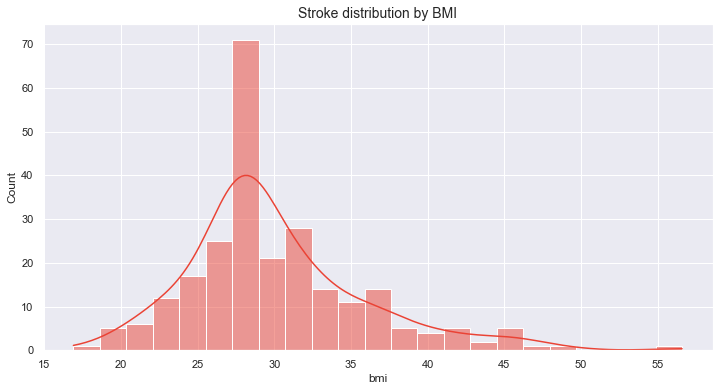

In [11]:
fig, ax = plt.subplots(figsize = (12, 6))
plt.title('Stroke distribution by BMI', size = 14)

sb.histplot(adjusted_data[adjusted_data['stroke']==1], x="bmi", ax=ax, kde=True, color='#ea4335')
plt.xlabel('bmi', )

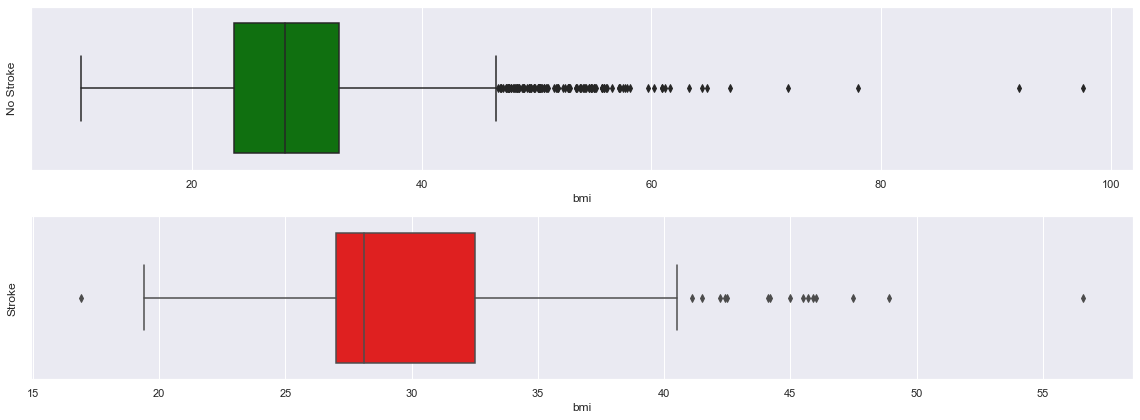

In [12]:
fig, ax = plt.subplots(2,1, figsize = (16,6))

sb.boxplot(x = adjusted_data[adjusted_data["stroke"] == 0]["bmi"],color='green', ax = ax[0]).set(ylabel = 'No Stroke')
sb.boxplot(x =adjusted_data[adjusted_data["stroke"] == 1]["bmi"],color='red', ax = ax[1]).set(ylabel = 'Stroke')
plt.tight_layout()

#### Analysis
diet
Patients with stroke have a higher median Body Mass Index as compared to patients who have not suffered from a stroke.

Body Mass Index, similar to average glucose levels, reveals an individual's diet and exercise levels. Proper balanced diets and frequent exercise leads to a lower BMI and also improves one's health. Hence, people with a higher BMI, may be at greater risk for a stroke.

# Categorical Variables

## Gender

<Figure size 864x432 with 0 Axes>

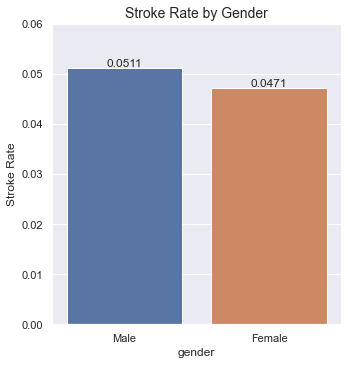

In [13]:
fig = plt.figure(figsize=(12, 6))
f = sb.catplot(x = "gender", y = "stroke",data = adjusted_data, kind = "bar", ci = None)
plt.title('Stroke Rate by Gender', size = 14)
plt.ylabel('Stroke Rate', )
ax = f.facet_axis(0, 0)
plt.ylim([0,0.06])
for c in ax.containers:
    labels = [f'{(v.get_height()):.4f}' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')

#### Analysis
Stroke Rate for Males is slightly higher than for Females. However, gender is not a feature that discriminates whether a person is likely to get or stroke or not.

## Hypertension

<Figure size 864x432 with 0 Axes>

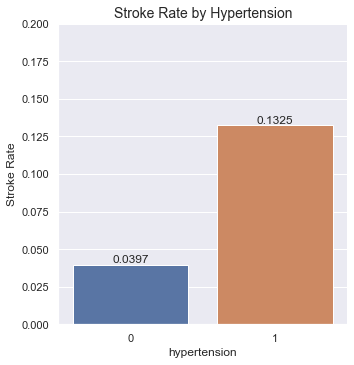

In [14]:
fig = plt.figure(figsize=(12, 6))
f = sb.catplot(x = "hypertension", y = "stroke", data = adjusted_data, kind = "bar", ci = None)
plt.title('Stroke Rate by Hypertension', size = 14)
plt.ylabel('Stroke Rate', )
ax = f.facet_axis(0, 0)
plt.ylim([0,0.2])
for c in ax.containers:
    labels = [f'{(v.get_height()):.4f}' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')

#### Analysis

Stroke rate is much higher among patients who also suffer from hypertension. Presence of such long-term illnesses are major indicators for strokes, as these greatly impact one's health.

## Heart Disease

<Figure size 864x432 with 0 Axes>

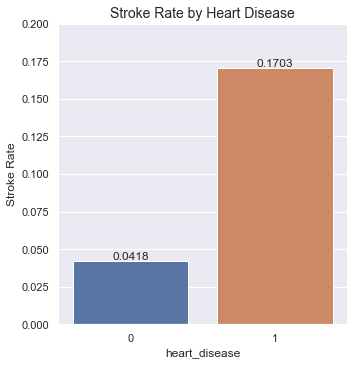

In [15]:
fig = plt.figure(figsize=(12, 6))
f = sb.catplot(x = "heart_disease", y = "stroke", data = adjusted_data, kind = "bar", ci = None)
plt.title('Stroke Rate by Heart Disease', size = 14)
plt.ylabel('Stroke Rate', )
ax = f.facet_axis(0, 0)
plt.ylim([0,0.2])
for c in ax.containers:
    labels = [f'{(v.get_height()):.4f}' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')

#### Analysis

Stroke rate is much higher among patients who also suffer from heart disease. Presence of such long-term illnesses are major indicators for strokes, as these greatly impact one's health.

## Residence Type

<Figure size 864x432 with 0 Axes>

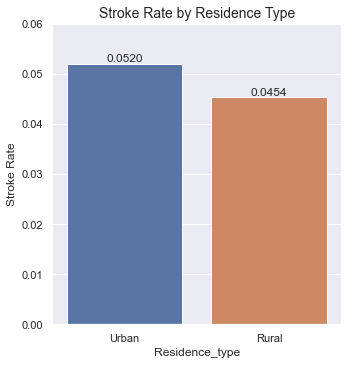

In [16]:
fig = plt.figure(figsize=(12, 6))
f = sb.catplot(x = "Residence_type", y = "stroke", data = adjusted_data, kind = "bar", ci = None)
plt.title('Stroke Rate by Residence Type', size = 14)
plt.ylabel('Stroke Rate', )
ax = f.facet_axis(0, 0)
plt.ylim([0,0.06])
for c in ax.containers:
    labels = [f'{(v.get_height()):.4f}' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')

#### Analysis

Stroke rate for both genders is much slightly higher among patients living in urban residential areas as compared to rural areas.
- This could be due to lifestyle differences between those who live in the city vs those who live in rural areas, where the constant stimulation of city life can chip away an individual's immune system.
- On the other hand, those who live in rural areas could be leading more relaxed lifestyles. Constant exposure to the natural environment is beneficial to health as well. 

## Ever_married

<Figure size 864x432 with 0 Axes>

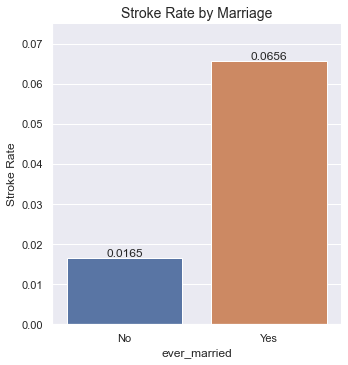

In [17]:
fig = plt.figure(figsize=(12, 6))
f = sb.catplot(x = "ever_married", y = "stroke", data = adjusted_data, kind = "bar", ci = None, order = ["No","Yes"])
plt.title('Stroke Rate by Marriage', size = 14)
plt.ylabel('Stroke Rate', )
ax = f.facet_axis(0, 0)
plt.ylim([0,0.075])
for c in ax.containers:
    labels = [f'{(v.get_height()):.4f}' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')

#### Analysis

Stroke rate for both genders is much higher among patients who have been married before. 

Married individuals seem to have a higher stroke rate, which may be a result of greater likelihood of conflict. Conflict leads to stress which has been found to be closely linked to stroke. Stress can cause the heart to work harder, increase blood pressure, and increase sugar and fat levels in the blood. These things, in turn, can increase the risk of clots forming and travelling to the heart or brain, causing a heart attack or stroke.


## Work_type

<Figure size 864x432 with 0 Axes>

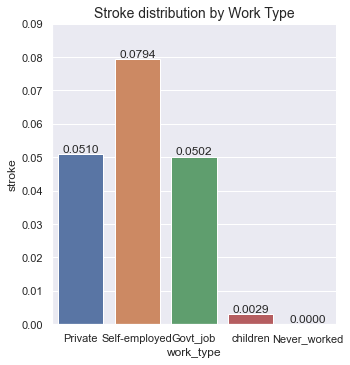

In [24]:
fig = plt.figure(figsize=(12, 6))
f = sb.catplot(x="work_type", y="stroke", kind="bar", data=adjusted_data, ci = None)
plt.title('Stroke distribution by Work Type', size = 14)
ax = f.facet_axis(0, 0)
plt.ylim([0,0.09])
for c in ax.containers:
    labels = [f'{(v.get_height()):.4f}' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')

#### Analysis

Stroke rate among patients who are self-employed are the highest, while stroke rate is the lowest among patients who have never worked.

A likely reason is that the uncertainty of such a career causes greater stress and hence a higher stroke rate.

## Smoking_status

<Figure size 864x432 with 0 Axes>

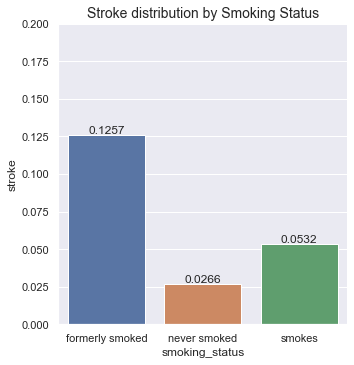

In [19]:
fig = plt.figure(figsize=(12, 6))
f = sb.catplot(x="smoking_status", y="stroke", kind="bar", data=adjusted_data, ci = None)
plt.title('Stroke distribution by Smoking Status', size = 14)
ax = f.facet_axis(0, 0)
plt.ylim([0,0.2])
for c in ax.containers:
    labels = [f'{(v.get_height()):.4f}' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')

#### Analysis

Stroke rate is the highest for patients who formerly smoked, and the lowest for patients who have never smoked.

Smoking is linked to various health consequences, which may inhibit the body's ability to function, increaseing susceptibility to a stroke. The stroke rate being the highest among former smokers may be due to the nature of former smokers. 43.2% of ex-smokers mentioned a current health condition as the main reason to stop smoking. Hence, this demographic is very likely to have already been afflicted with an illness, indicating poor health and therefore having the highest stroke rate.


## Correlation

In [20]:
#Manual Ordinal Encoding of Smoking Status (never smoked = 0, formerly smoked = 1, smokes = 2)
temp_data = adjusted_data
temp_data['smoking_status'] = temp_data['smoking_status'].replace(['never smoked'],0)
temp_data['smoking_status'] = temp_data['smoking_status'].replace(['formerly smoked'],1)
temp_data['smoking_status'] = temp_data['smoking_status'].replace(['smokes'],2)


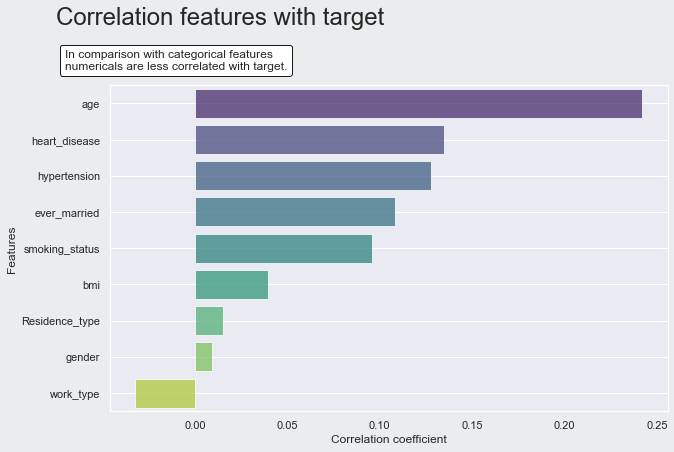

In [21]:
#Encoding of All categorical variables 
le = LabelEncoder()
en_df = temp_data.apply(le.fit_transform)
features=['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type',
       'smoking_status','bmi']
from matplotlib.offsetbox import AnchoredText
correlation_table = []
for cols in features:
    y = en_df["stroke"]
    x = en_df[cols]
    corr = np.corrcoef(x, y)[1][0]
    dict ={
        'Features': cols,
        'Correlation coefficient' : corr,
        'Feat_type': 'numerical'
    }
    correlation_table.append(dict)
dF1 = pd.DataFrame(correlation_table)
fig = plt.figure(figsize=(10,6), facecolor='#EAECEE')
ax = sb.barplot(x="Correlation coefficient", y="Features", 
                     data=dF1.sort_values("Correlation coefficient", ascending=False),
                     palette='viridis', alpha=0.75)
ax.grid()
#ax.set_title("Correlation of numerical features with Target", fontsize=20, y=1.05)

title =  'Correlation features with target'
sub_title = 'In comparison with categorical features \
\nnumericals are less correlated with target.'

plt.gcf().text(0.05, 1.02, title, fontsize=24)


at1 = AnchoredText(sub_title,
                   loc='lower left', frameon=True,
                   bbox_to_anchor=(-0.1, 1.01),
                   bbox_transform=ax.transAxes,
                   #prop=dict(size=8),
                   )
at1.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
ax.add_artist(at1)

<AxesSubplot:>

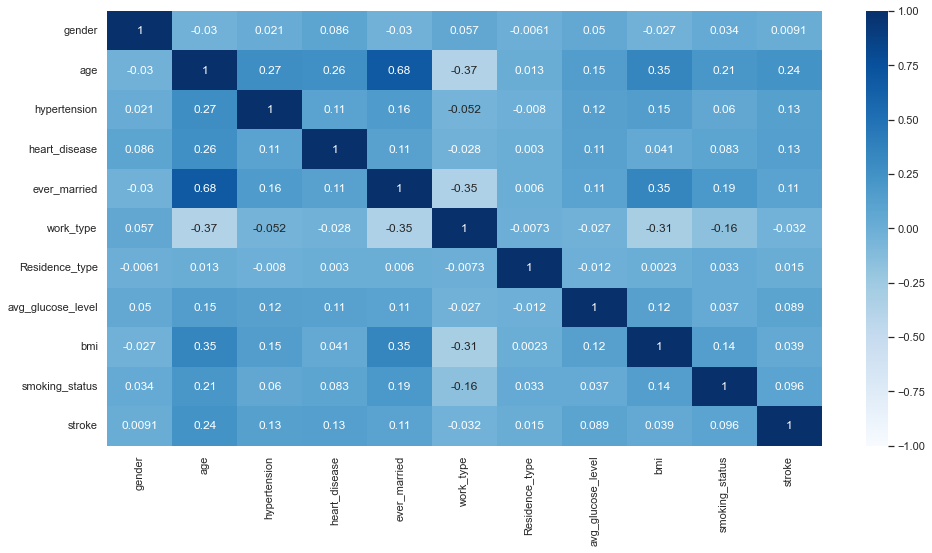

In [22]:
plt.figure(figsize=(16,8))
sb.heatmap(en_df.drop("Unnamed: 0", axis=1).corr(),cmap="Blues",annot = True, vmin = -1, vmax = 1)

## Correlation Analysis

In [23]:
for var in features:
    print("Feature :" + var)
    print("Correlation Coefficient: " + str(en_df[var].corr(en_df.stroke)))
    print("")

Feature :gender
Correlation Coefficient: 0.0090806001600795

Feature :age
Correlation Coefficient: 0.24210354719240368

Feature :hypertension
Correlation Coefficient: 0.12789125912919094

Feature :heart_disease
Correlation Coefficient: 0.1349048418004307

Feature :ever_married
Correlation Coefficient: 0.10829931566075555

Feature :work_type
Correlation Coefficient: -0.03232315938520046

Feature :Residence_type
Correlation Coefficient: 0.015414584210316112

Feature :smoking_status
Correlation Coefficient: 0.09572612994013192

Feature :bmi
Correlation Coefficient: 0.03943758117068437



#### Analysis of Correlation
In decreasing order of correlation (magnitude):
1. age
2. heart disease
3. hypertension
4. ever_married
5. smoking_status
6. bmi
7. work_type
8. residence_type
9. gender

**The variable with the highest linear correlation with stroke rate among patients is age.**
**The variable with the least linear correlation with stroke rate is gender.**

# Overall evaluation

Judging by the data, the **most relevant factors** to look at are:
- age
- presence of hypertension
- heart disease
- whether the patient has been married

The **less relevant factors** are:
- gender
- residence type
- body mass index

However, we are not excluding any of the factors in our machine learning. This is because further research tells us that these are influential to the factors which increases risk of strokes, such as high blood pressure. For instance, women are expected to have a longer life span and thus may face greater number of stroke events. Furthermore, women are exposed to events such as pregnancy and they are likely to have experienced higher blood pressure during pregnancy. 